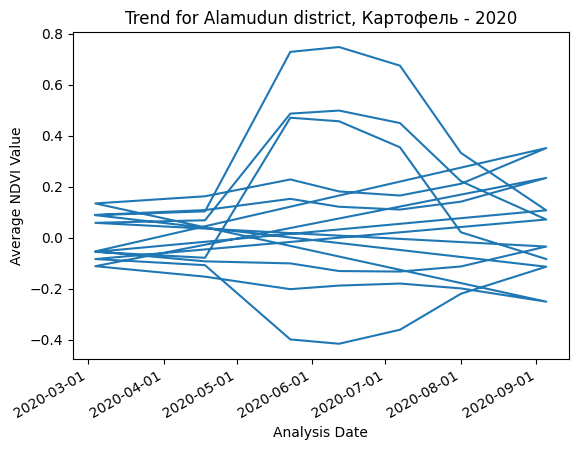

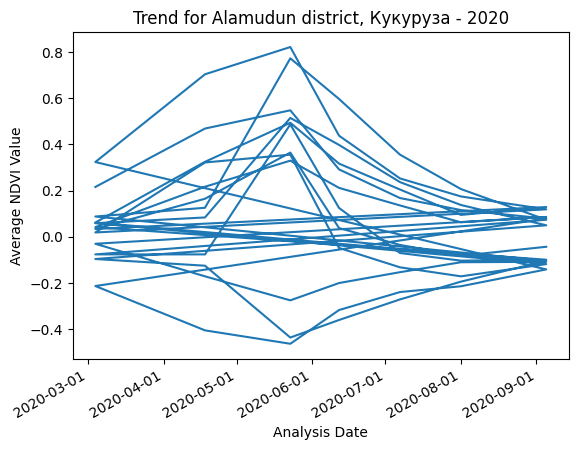

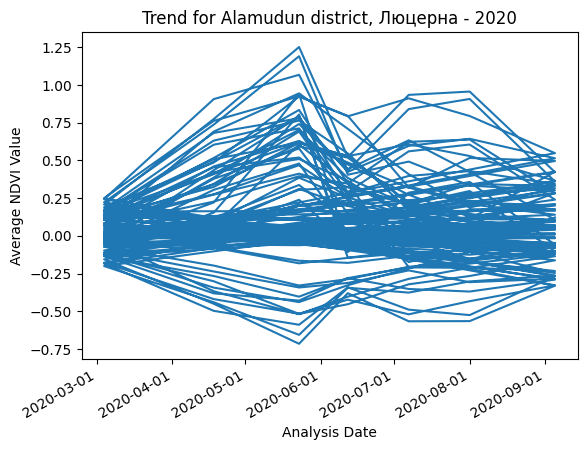

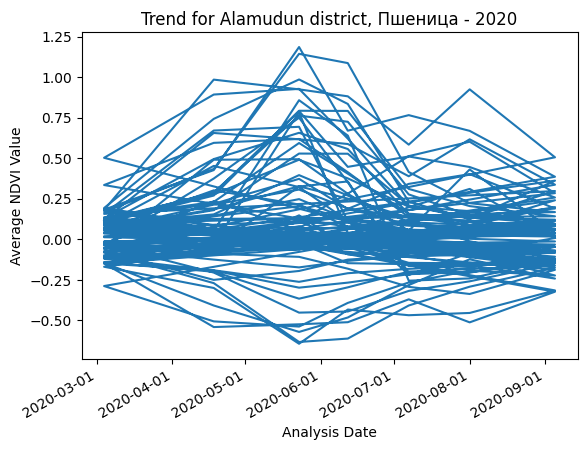

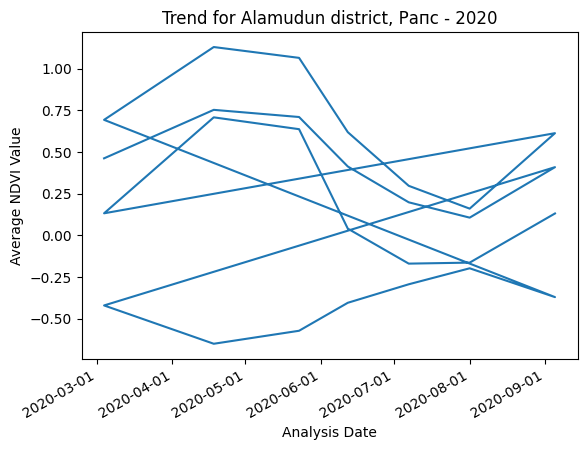

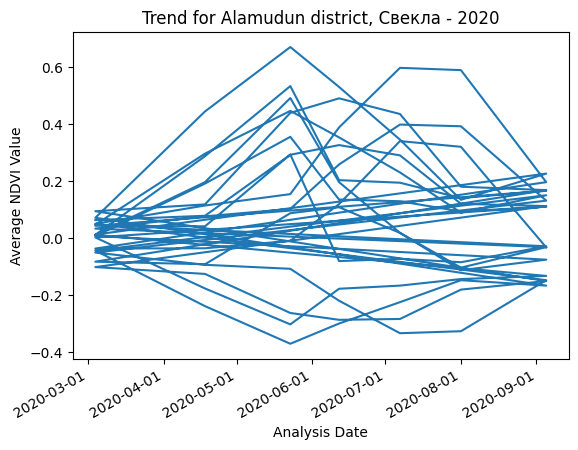

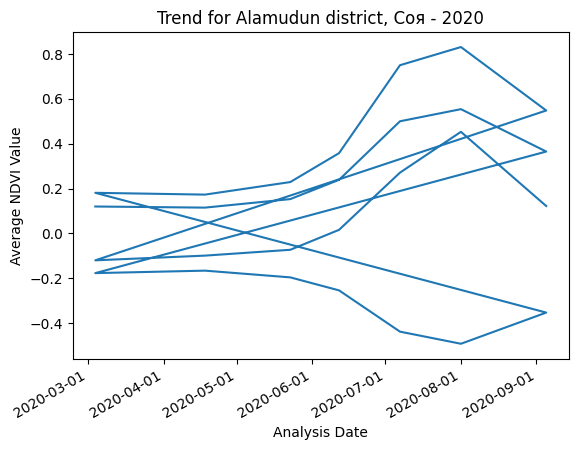

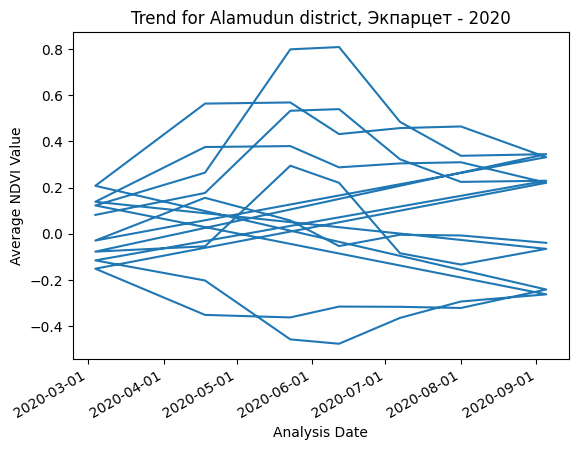

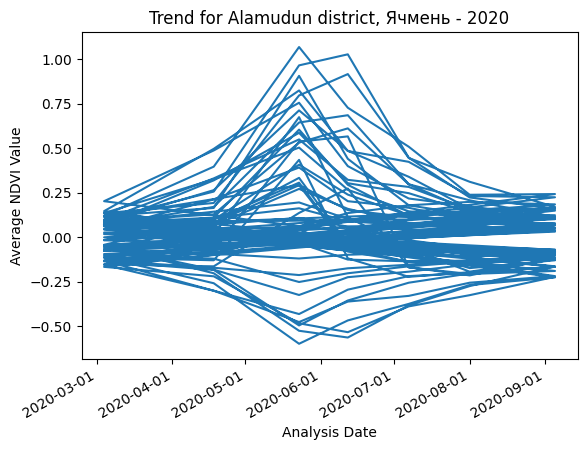

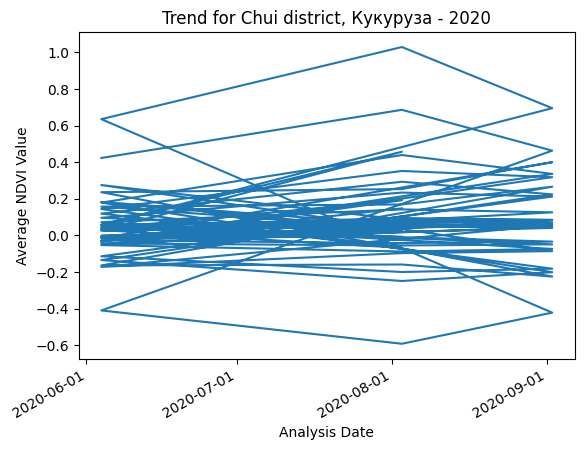

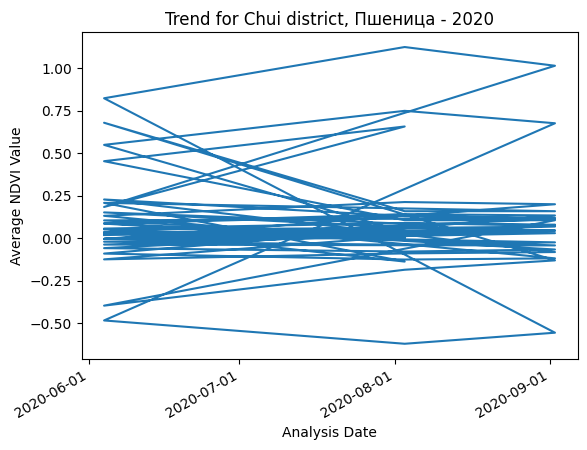

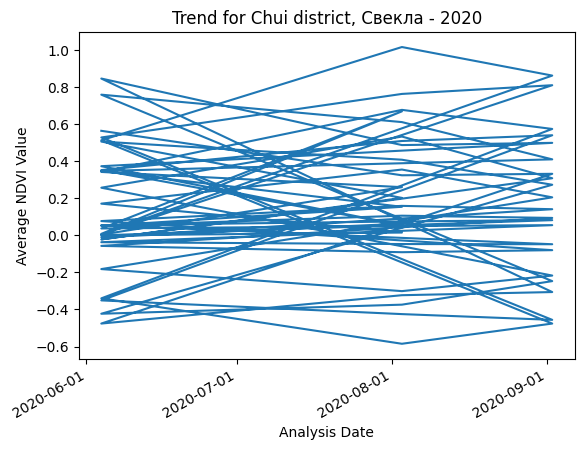

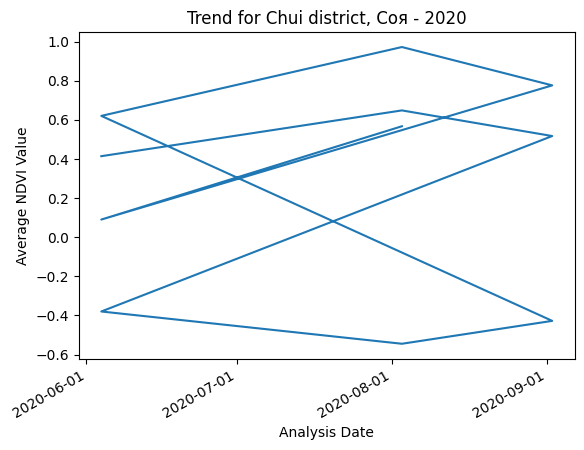

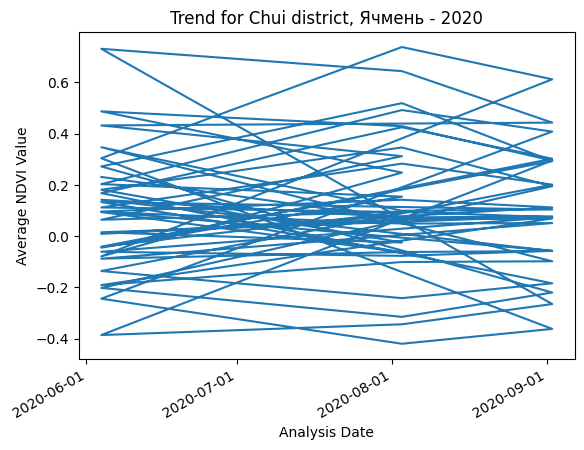

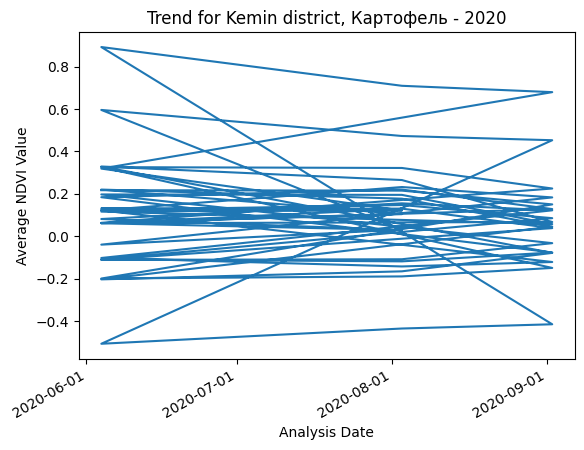

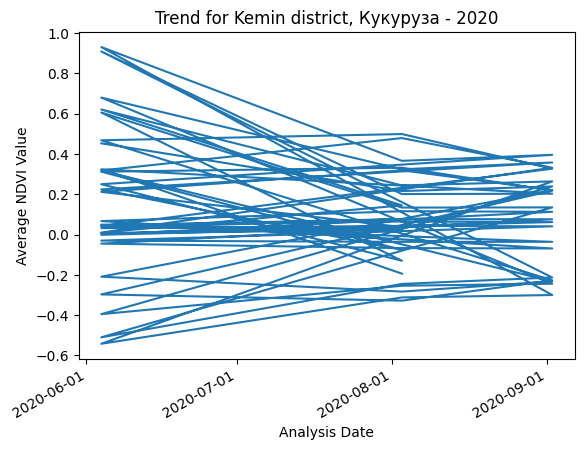

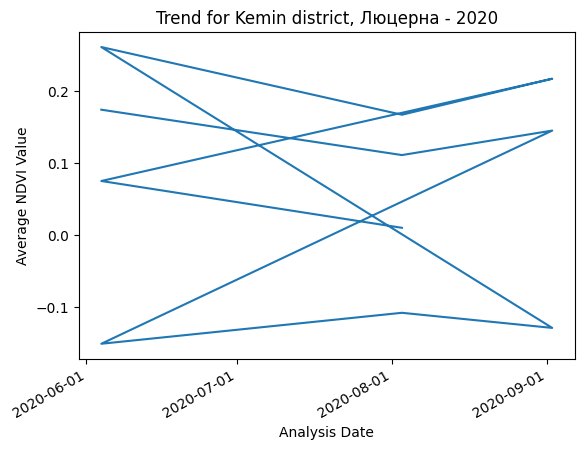

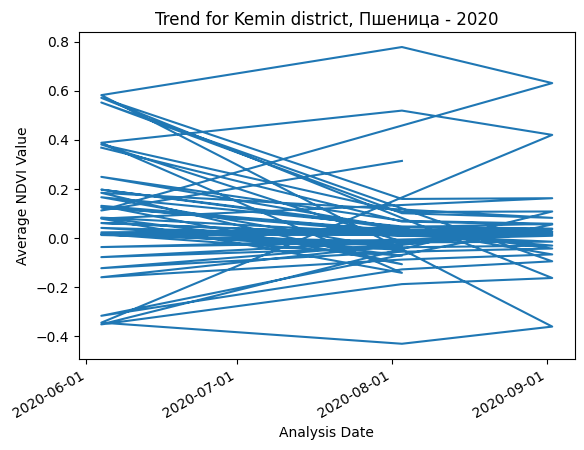

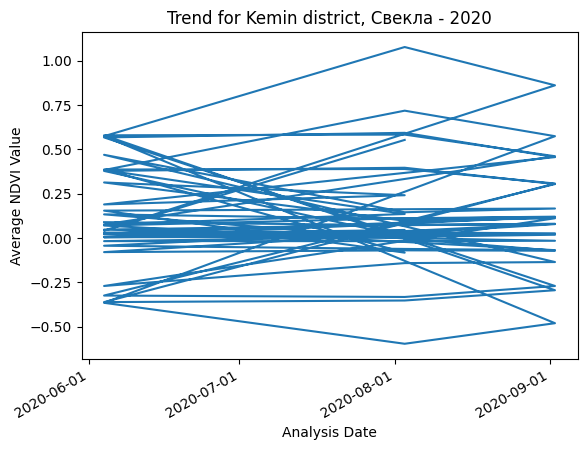

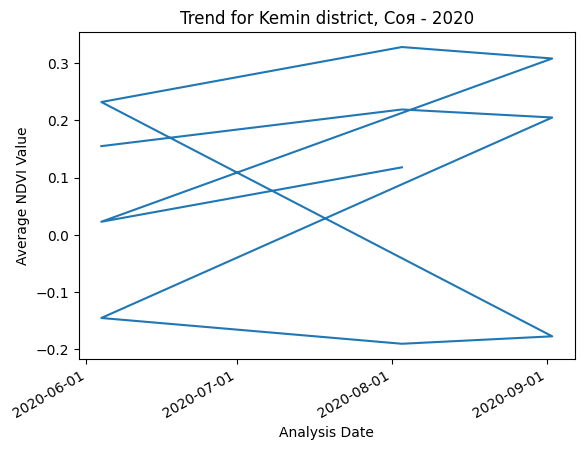

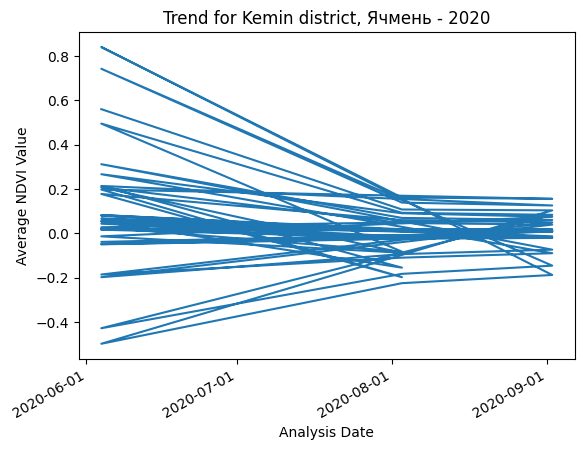

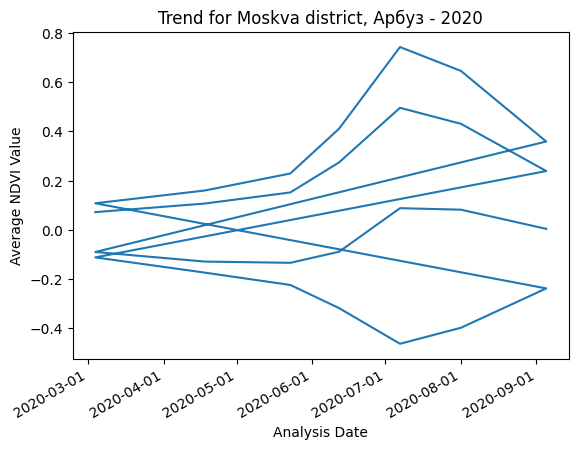

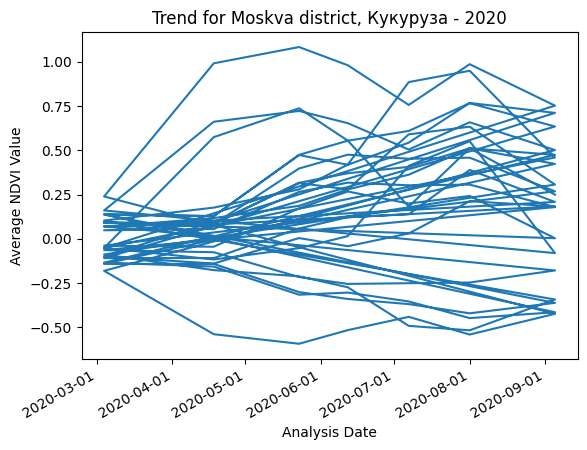

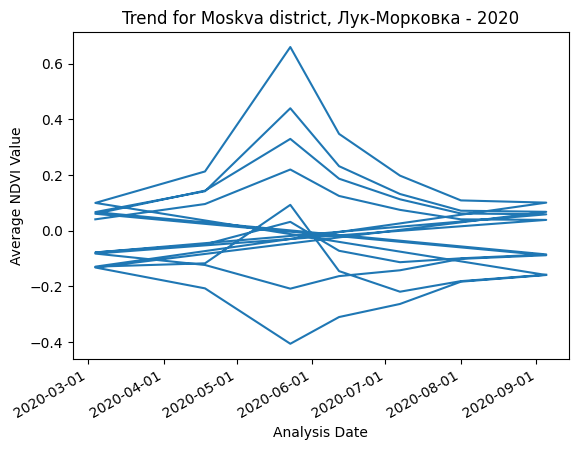

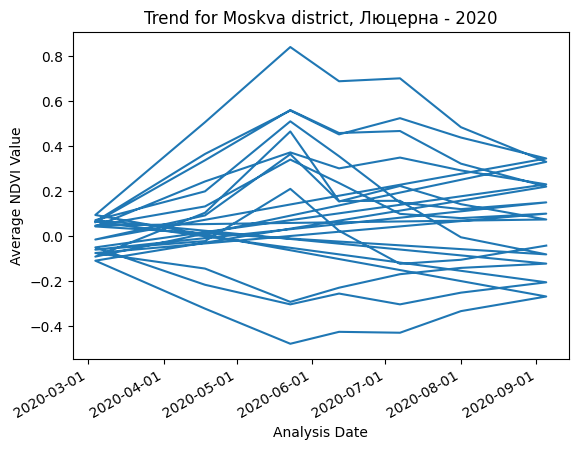

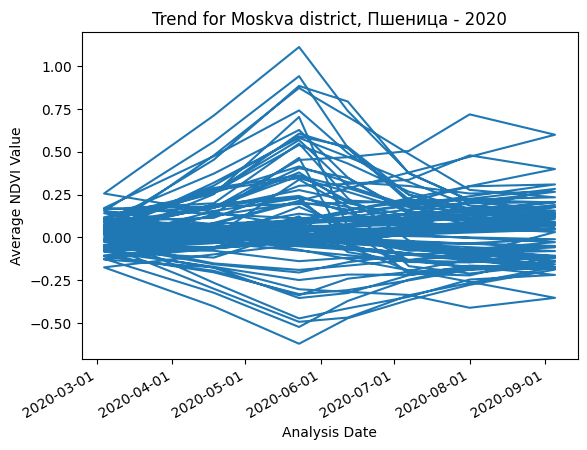

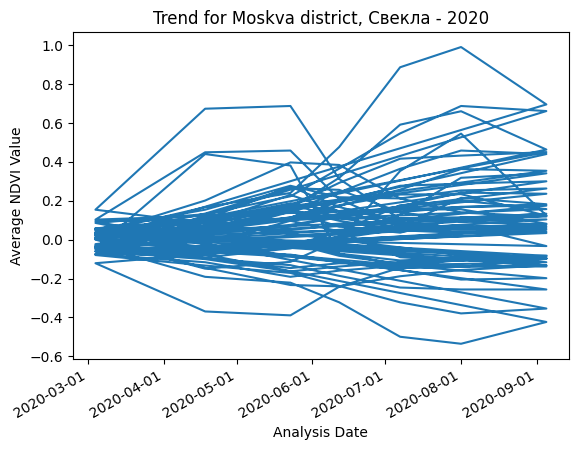

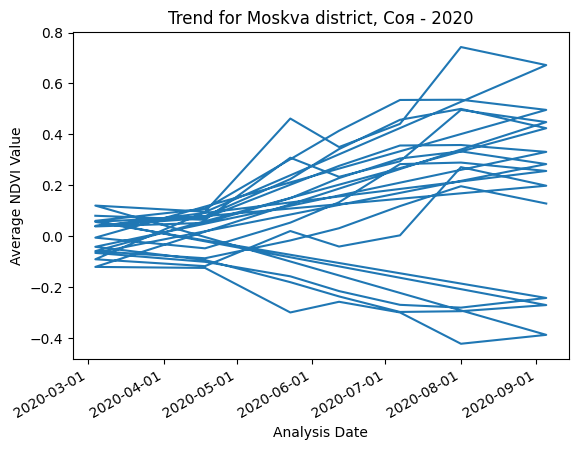

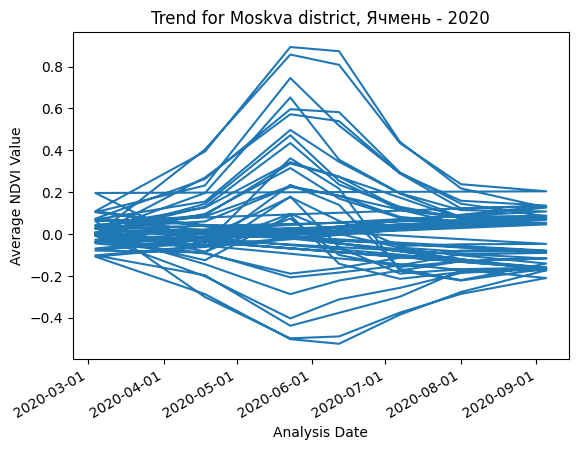

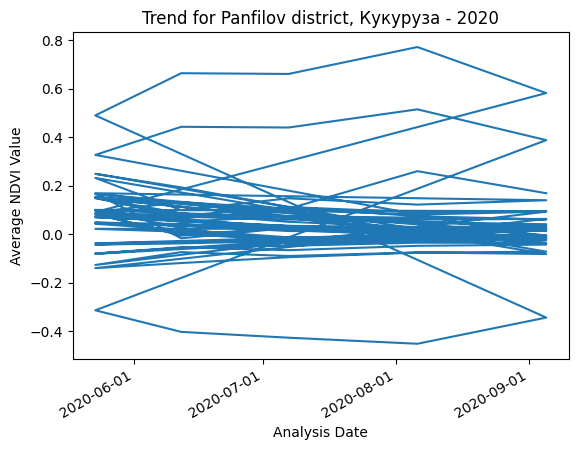

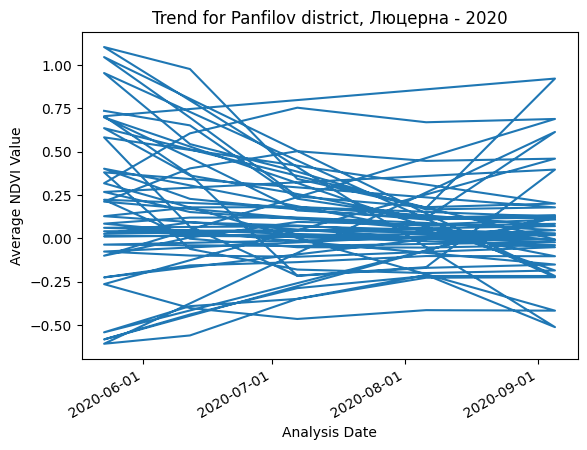

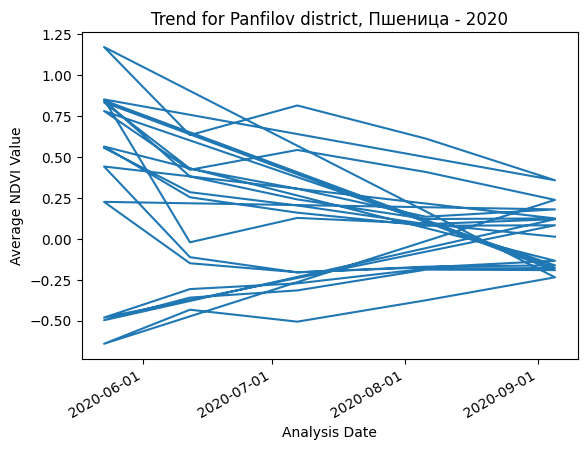

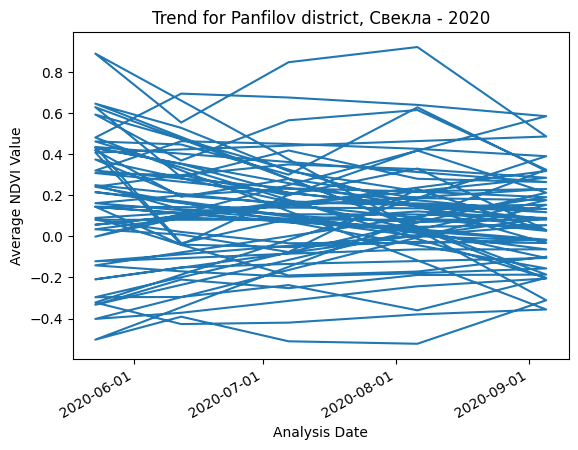

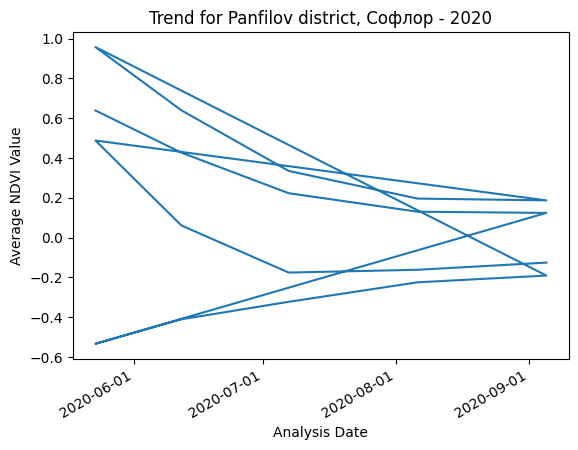

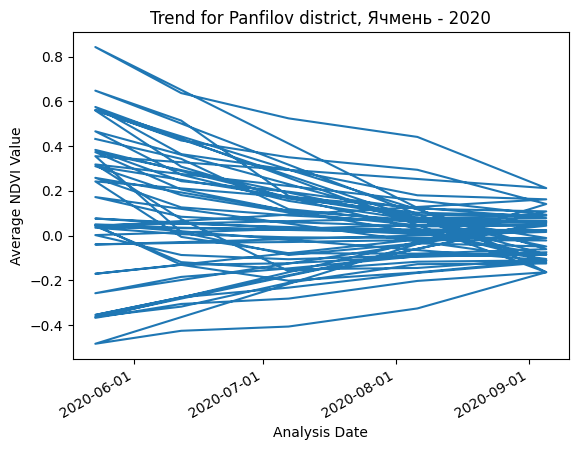

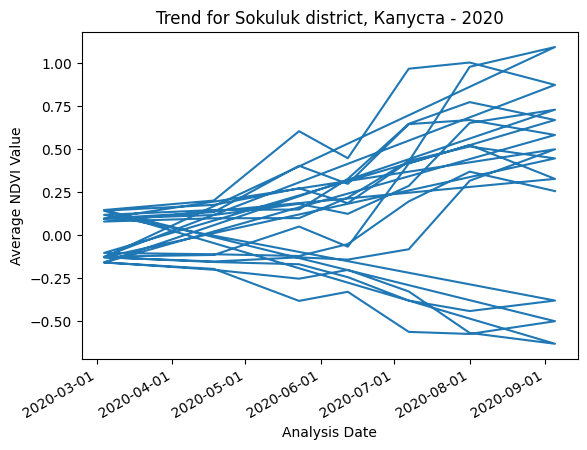

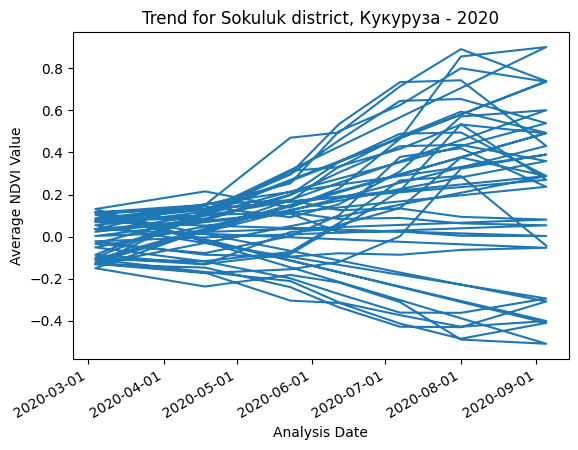

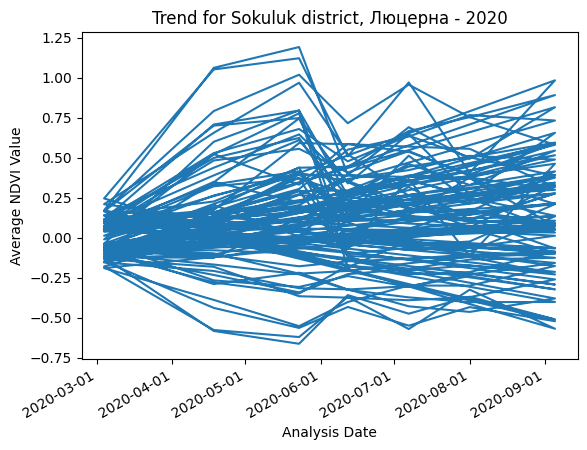

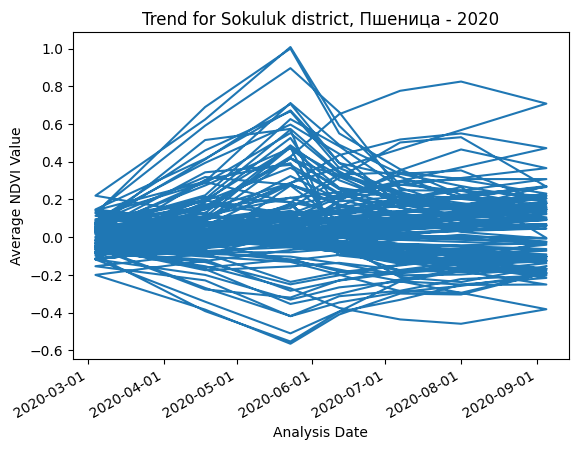

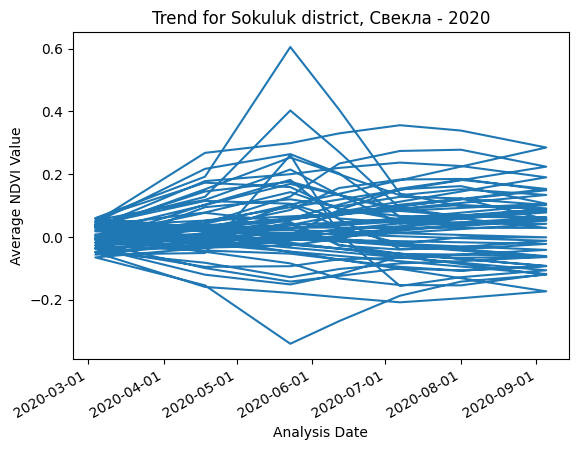

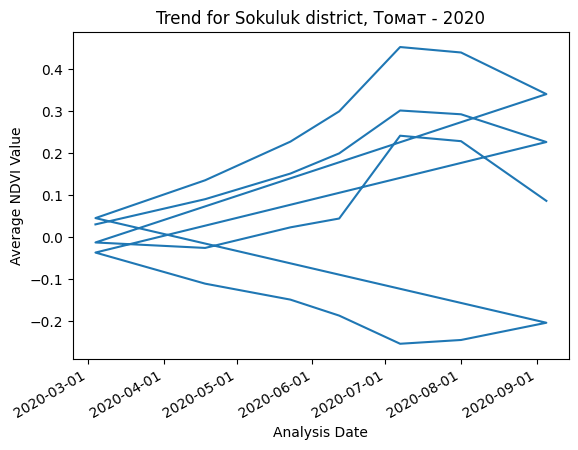

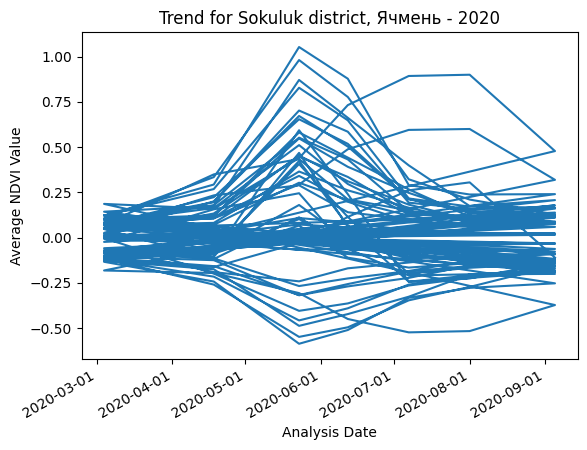

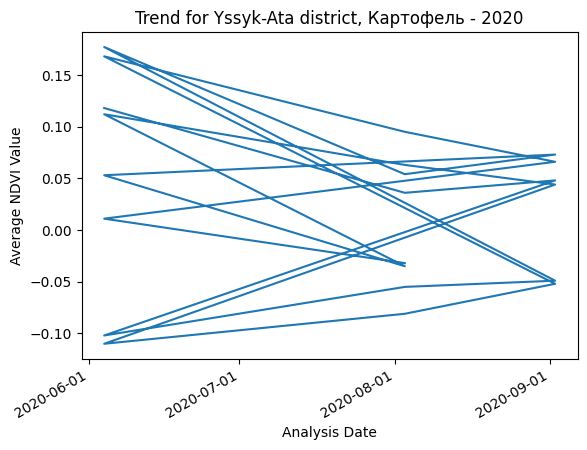

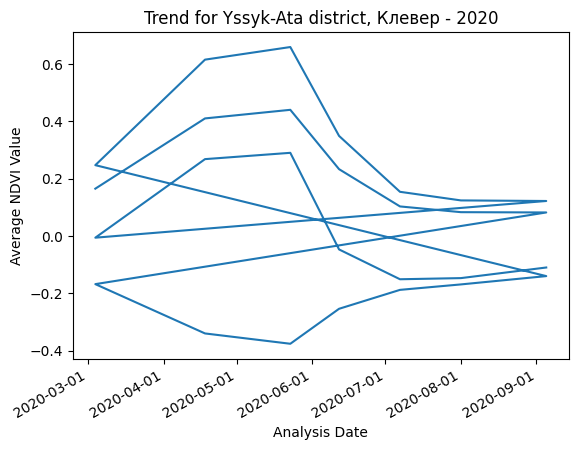

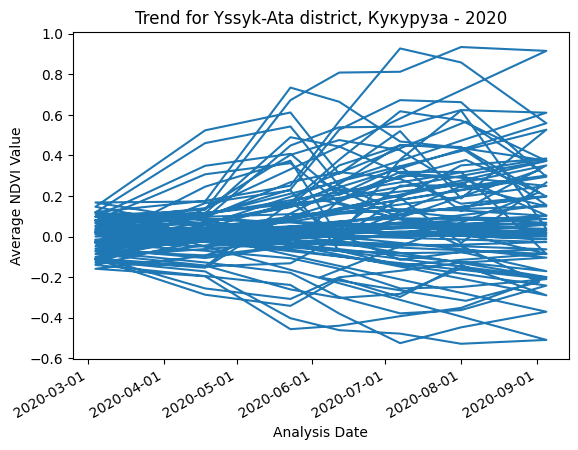

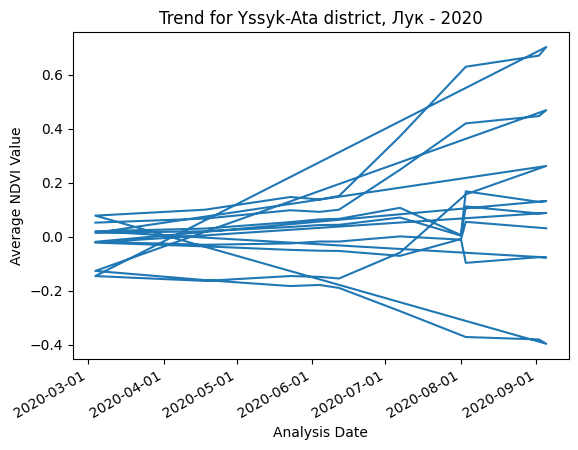

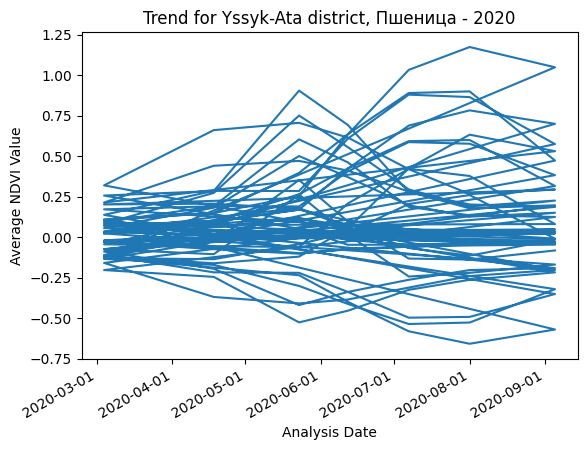

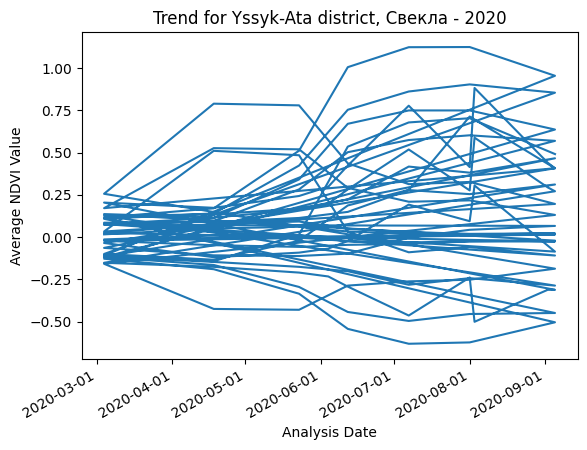

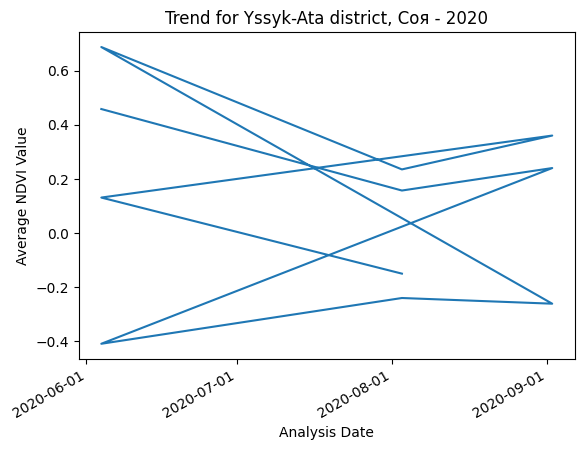

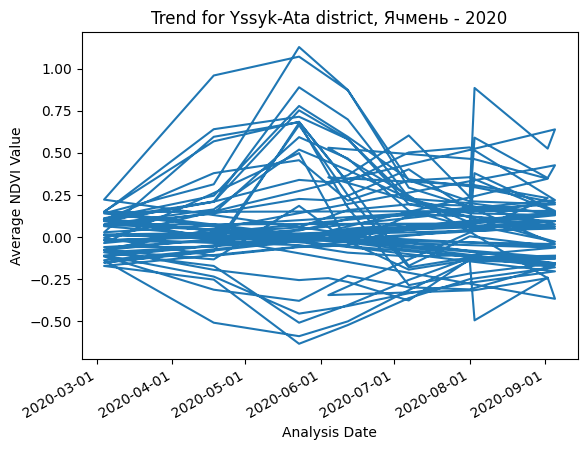

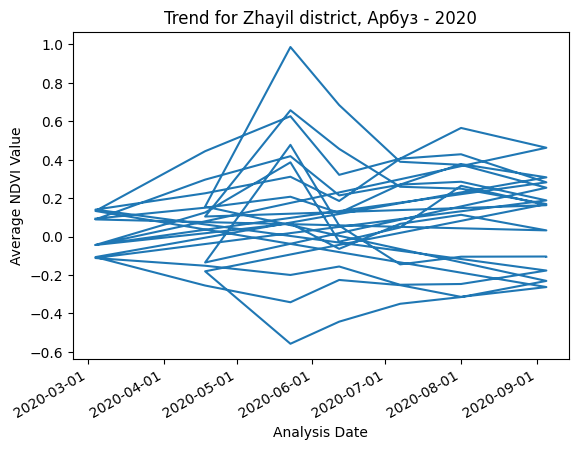

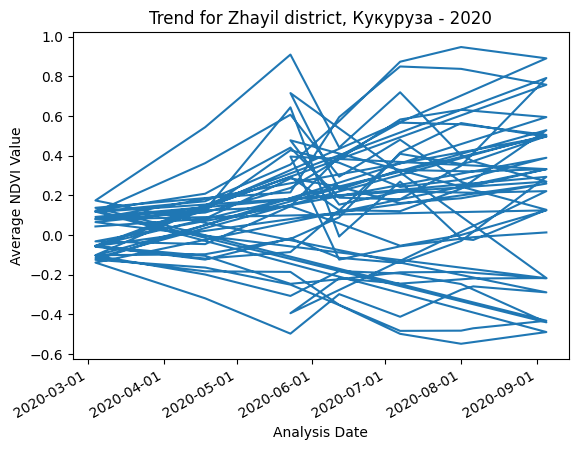

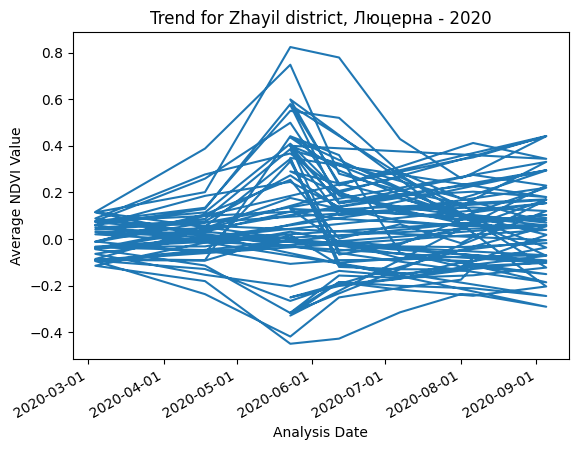

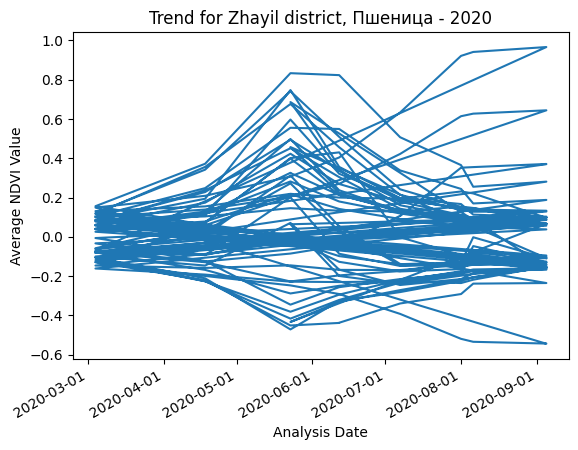

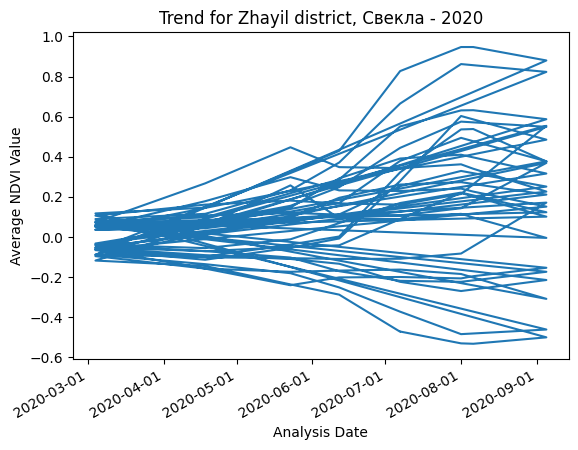

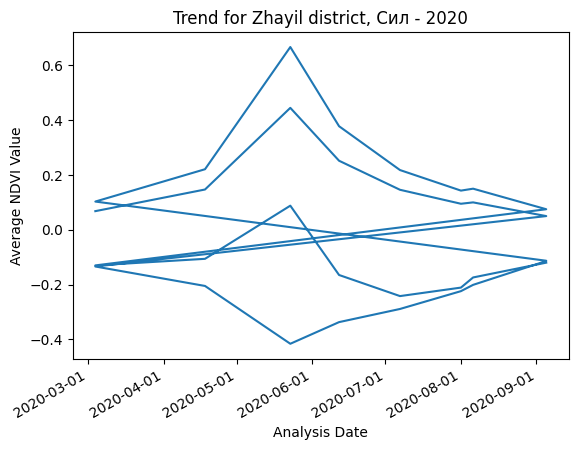

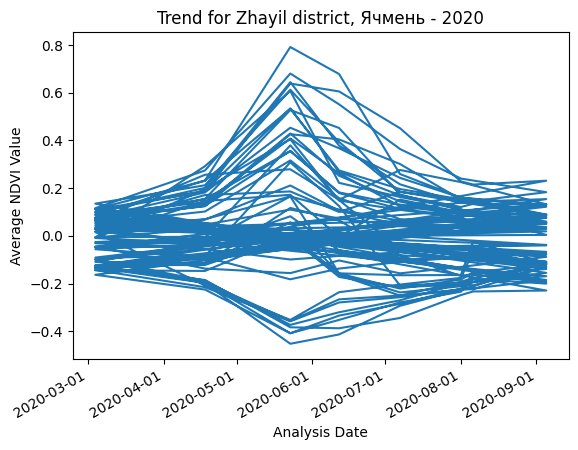

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the JSON file
with open('dataSet_Culture_06102023-POINT.json', 'r') as file:
    data_list = json.load(file)

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data_list)

# Convert 'Analysis Date' to datetime, if it's not already
df['Analysis Date'] = pd.to_datetime(df['Analysis Date'])

# Ensure the data types are correct for this column
df['averagevalue'] = pd.to_numeric(df['averagevalue'])

# Filter the data for the year 2020
df_2020 = df[df['year contour'] == '2020']

# Group the 2020 data by 'district_name' and 'culture_name'
grouped = df_2020.groupby(['district_name', 'culture_name'])

# Create a new figure for each group
for (district_name, culture_name), group in grouped:
    plt.figure()  # Start a new figure

    # Create a plot for the current group
    plt.plot_date(group['Analysis Date'], group['averagevalue'], '-')

    # Improve formatting
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate month markers
    plt.gcf().autofmt_xdate()  # Rotate date labels to avoid overlap

    # Set the labels and title
    plt.xlabel('Analysis Date')
    plt.ylabel('Average NDVI Value')
    plt.title(f'Trend for {district_name}, {culture_name} - 2020')
    
    # Show the plot
    plt.show()
